In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def hex_to_rgb(hex_color):
    # Remove the '#' if present
    hex_color = hex_color.lstrip('#')
    # Convert to integers (R, G, B)
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

# Example usage
hex_color = "#4A90E2"
rgb = hex_to_rgb(hex_color)
print(rgb)

(74, 144, 226)


In [3]:
# Weighted Average Projection
def wap(c):
    x = 0.3 * c[0] + 0.6 * c[1] * 0.1 * c[2]
    y = 0.5 * c[0] - 0.4 * c[1] * 0.9 * c[2]
    return (x, y)

In [4]:
# normalization to 0-255 range
def norm_255(z):
    xmin = min([i[0] for i in z])
    xmax = max([i[0] for i in z])
    ymin = min([i[1] for i in z])
    ymax = max([i[1] for i in z])

    if xmin == xmax:
        xmin = 0
        xmax = 255
    if ymin == ymax:
        ymin = 0
        ymax = 255
        
    
    x = [int((i[0] - xmin) / (xmax - xmin) * 255) for i in z]
    y = [int((i[1] - ymin) / (ymax - ymin) * 255) for i in z]
    
    new_z = [(x[i], y[i]) for i, j in enumerate(z)]
    return new_z

In [5]:
# Sand_0 is for sand with bright color
df_W = pd.read_csv("Sand_0_W_Color_Hex.csv")
df_T = pd.read_csv("Sand_0_T_Color_Hex.csv")

# header or column names
hW = df_W.columns
hT = df_T.columns

print(hW)
print(hT)

Index(['Image', 'Average', 'Dominant', 'Darkest', 'Brightest'], dtype='object')
Index(['Image', 'Average', 'Dominant', 'Darkest', 'Brightest'], dtype='object')


In [6]:
yavgW = [hex_to_rgb(i) for i in list(df_W[hW[1]])]
ydomW = [hex_to_rgb(i) for i in list(df_W[hW[2]])]
ydrkW = [hex_to_rgb(i) for i in list(df_W[hW[3]])]
ybrgW = [hex_to_rgb(i) for i in list(df_W[hW[4]])]

zavgW = norm_255([wap(i) for i in yavgW])
zdomW = norm_255([wap(i) for i in ydomW])
zdrkW = norm_255([wap(i) for i in ydrkW])
zbrgW = norm_255([wap(i) for i in ybrgW])

In [7]:
yavgT = [hex_to_rgb(i) for i in list(df_T[hT[1]])]
ydomT = [hex_to_rgb(i) for i in list(df_T[hT[2]])]
ydrkT = [hex_to_rgb(i) for i in list(df_T[hT[3]])]
ybrgT = [hex_to_rgb(i) for i in list(df_T[hT[4]])]

zavgT = norm_255([wap(i) for i in yavgT])
zdomT = norm_255([wap(i) for i in ydomT])
zdrkT = norm_255([wap(i) for i in ydrkT])
zbrgT = norm_255([wap(i) for i in ybrgT])

In [8]:
def get_xy(z):
    x = [i[0] for i in z]
    y = [i[1] for i in z]
    return(x, y)

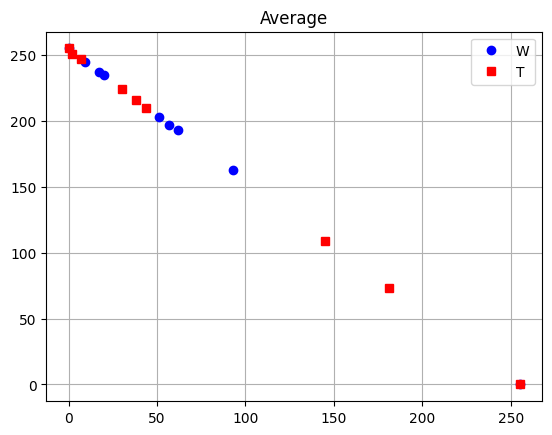

In [9]:
# average
(xW, yW) = get_xy(zavgW)
(xT, yT) = get_xy(zavgT)

plt.plot(xW, yW, 'ob', label='W')
plt.plot(xT, yT, 'sr', label='T')
plt.grid()
plt.legend()
plt.title('Average')
plt.show()

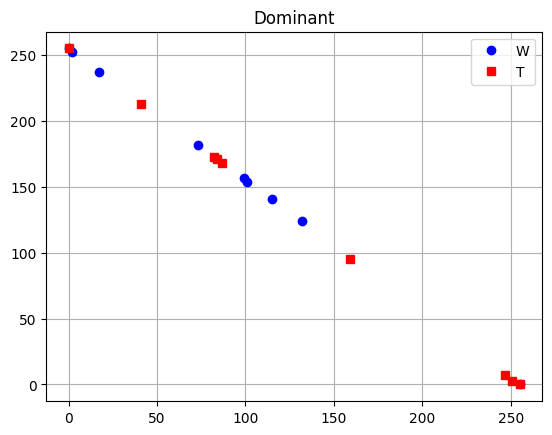

In [10]:
# dominant
(xW, yW) = get_xy(zdomW)
(xT, yT) = get_xy(zdomT)

plt.plot(xW, yW, 'ob', label='W')
plt.plot(xT, yT, 'sr', label='T')
plt.grid()
plt.legend()
plt.title('Dominant')
plt.show()

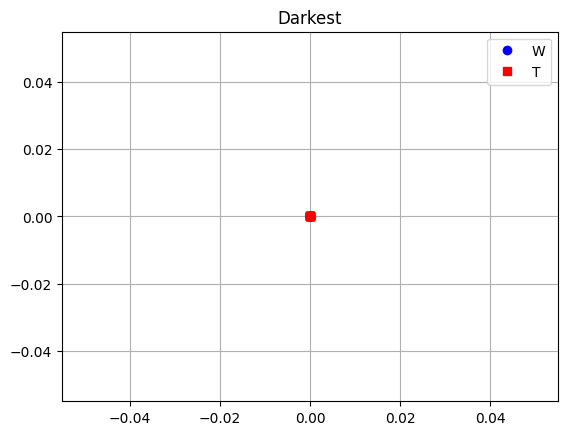

In [11]:
# darkest
(xW, yW) = get_xy(zdrkW)
(xT, yT) = get_xy(zdrkT)

plt.plot(xW, yW, 'ob', label='W')
plt.plot(xT, yT, 'sr', label='T')
plt.grid()
plt.legend()
plt.title('Darkest')
plt.show()

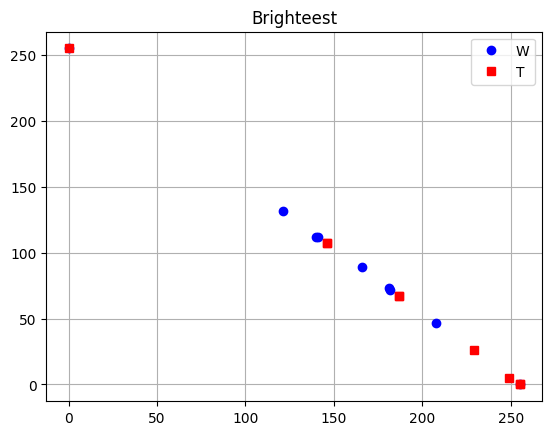

In [12]:
# brightest
(xW, yW) = get_xy(zbrgW)
(xT, yT) = get_xy(zbrgT)

plt.plot(xW, yW, 'ob', label='W')
plt.plot(xT, yT, 'sr', label='T')
plt.grid()
plt.legend()
plt.title('Brighteest')
plt.show()